In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import os

In [3]:
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\HCC_Lu\HCC_Lu_preprocessed_noscale.h5ad")
# adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/HCC_Lu/HCC_Lu_preprocessed_noscale.h5ad')
adata = sc.read_h5ad(dataset_dir / 'HCC_Lu/HCC_Lu_preprocessed_noscale.h5ad')
clusters = [f'Leiden_{i}' for i in range(24)]
print(clusters)

['Leiden_0', 'Leiden_1', 'Leiden_2', 'Leiden_3', 'Leiden_4', 'Leiden_5', 'Leiden_6', 'Leiden_7', 'Leiden_8', 'Leiden_9', 'Leiden_10', 'Leiden_11', 'Leiden_12', 'Leiden_13', 'Leiden_14', 'Leiden_15', 'Leiden_16', 'Leiden_17', 'Leiden_18', 'Leiden_19', 'Leiden_20', 'Leiden_21', 'Leiden_22', 'Leiden_23']


c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\evanlee\AppData\Local\Programs\Python\Python39\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


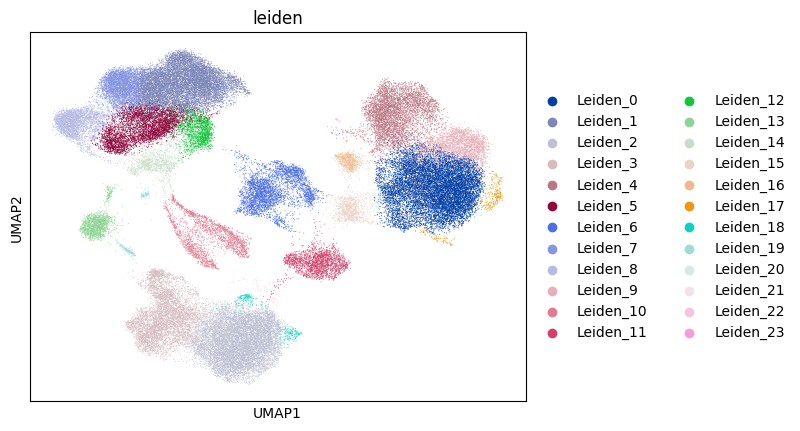

In [3]:
# UMAP embedding in adata
sc.pl.umap(adata, color=['leiden'])

In [5]:
# annotate the group of mitochondrial genes as "mt"
adata.var["mt"] = adata.var_names.str.startswith("MT-")

In [6]:
adata.var.head()

,mt
RP11-34P13.7,False
FO538757.2,False
AP006222.2,False
RP4-669L17.10,False
RP5-857K21.4,False


In [11]:
mito_genes = adata.var.loc[adata.var['mt']].index.tolist()
mito_genes

['MT-ND1',
 'MT-ND2',
 'MT-CO1',
 'MT-CO2',
 'MT-ATP8',
 'MT-ATP6',
 'MT-CO3',
 'MT-ND3',
 'MT-ND4L',
 'MT-ND4',
 'MT-ND5',
 'MT-ND6',
 'MT-CYB']

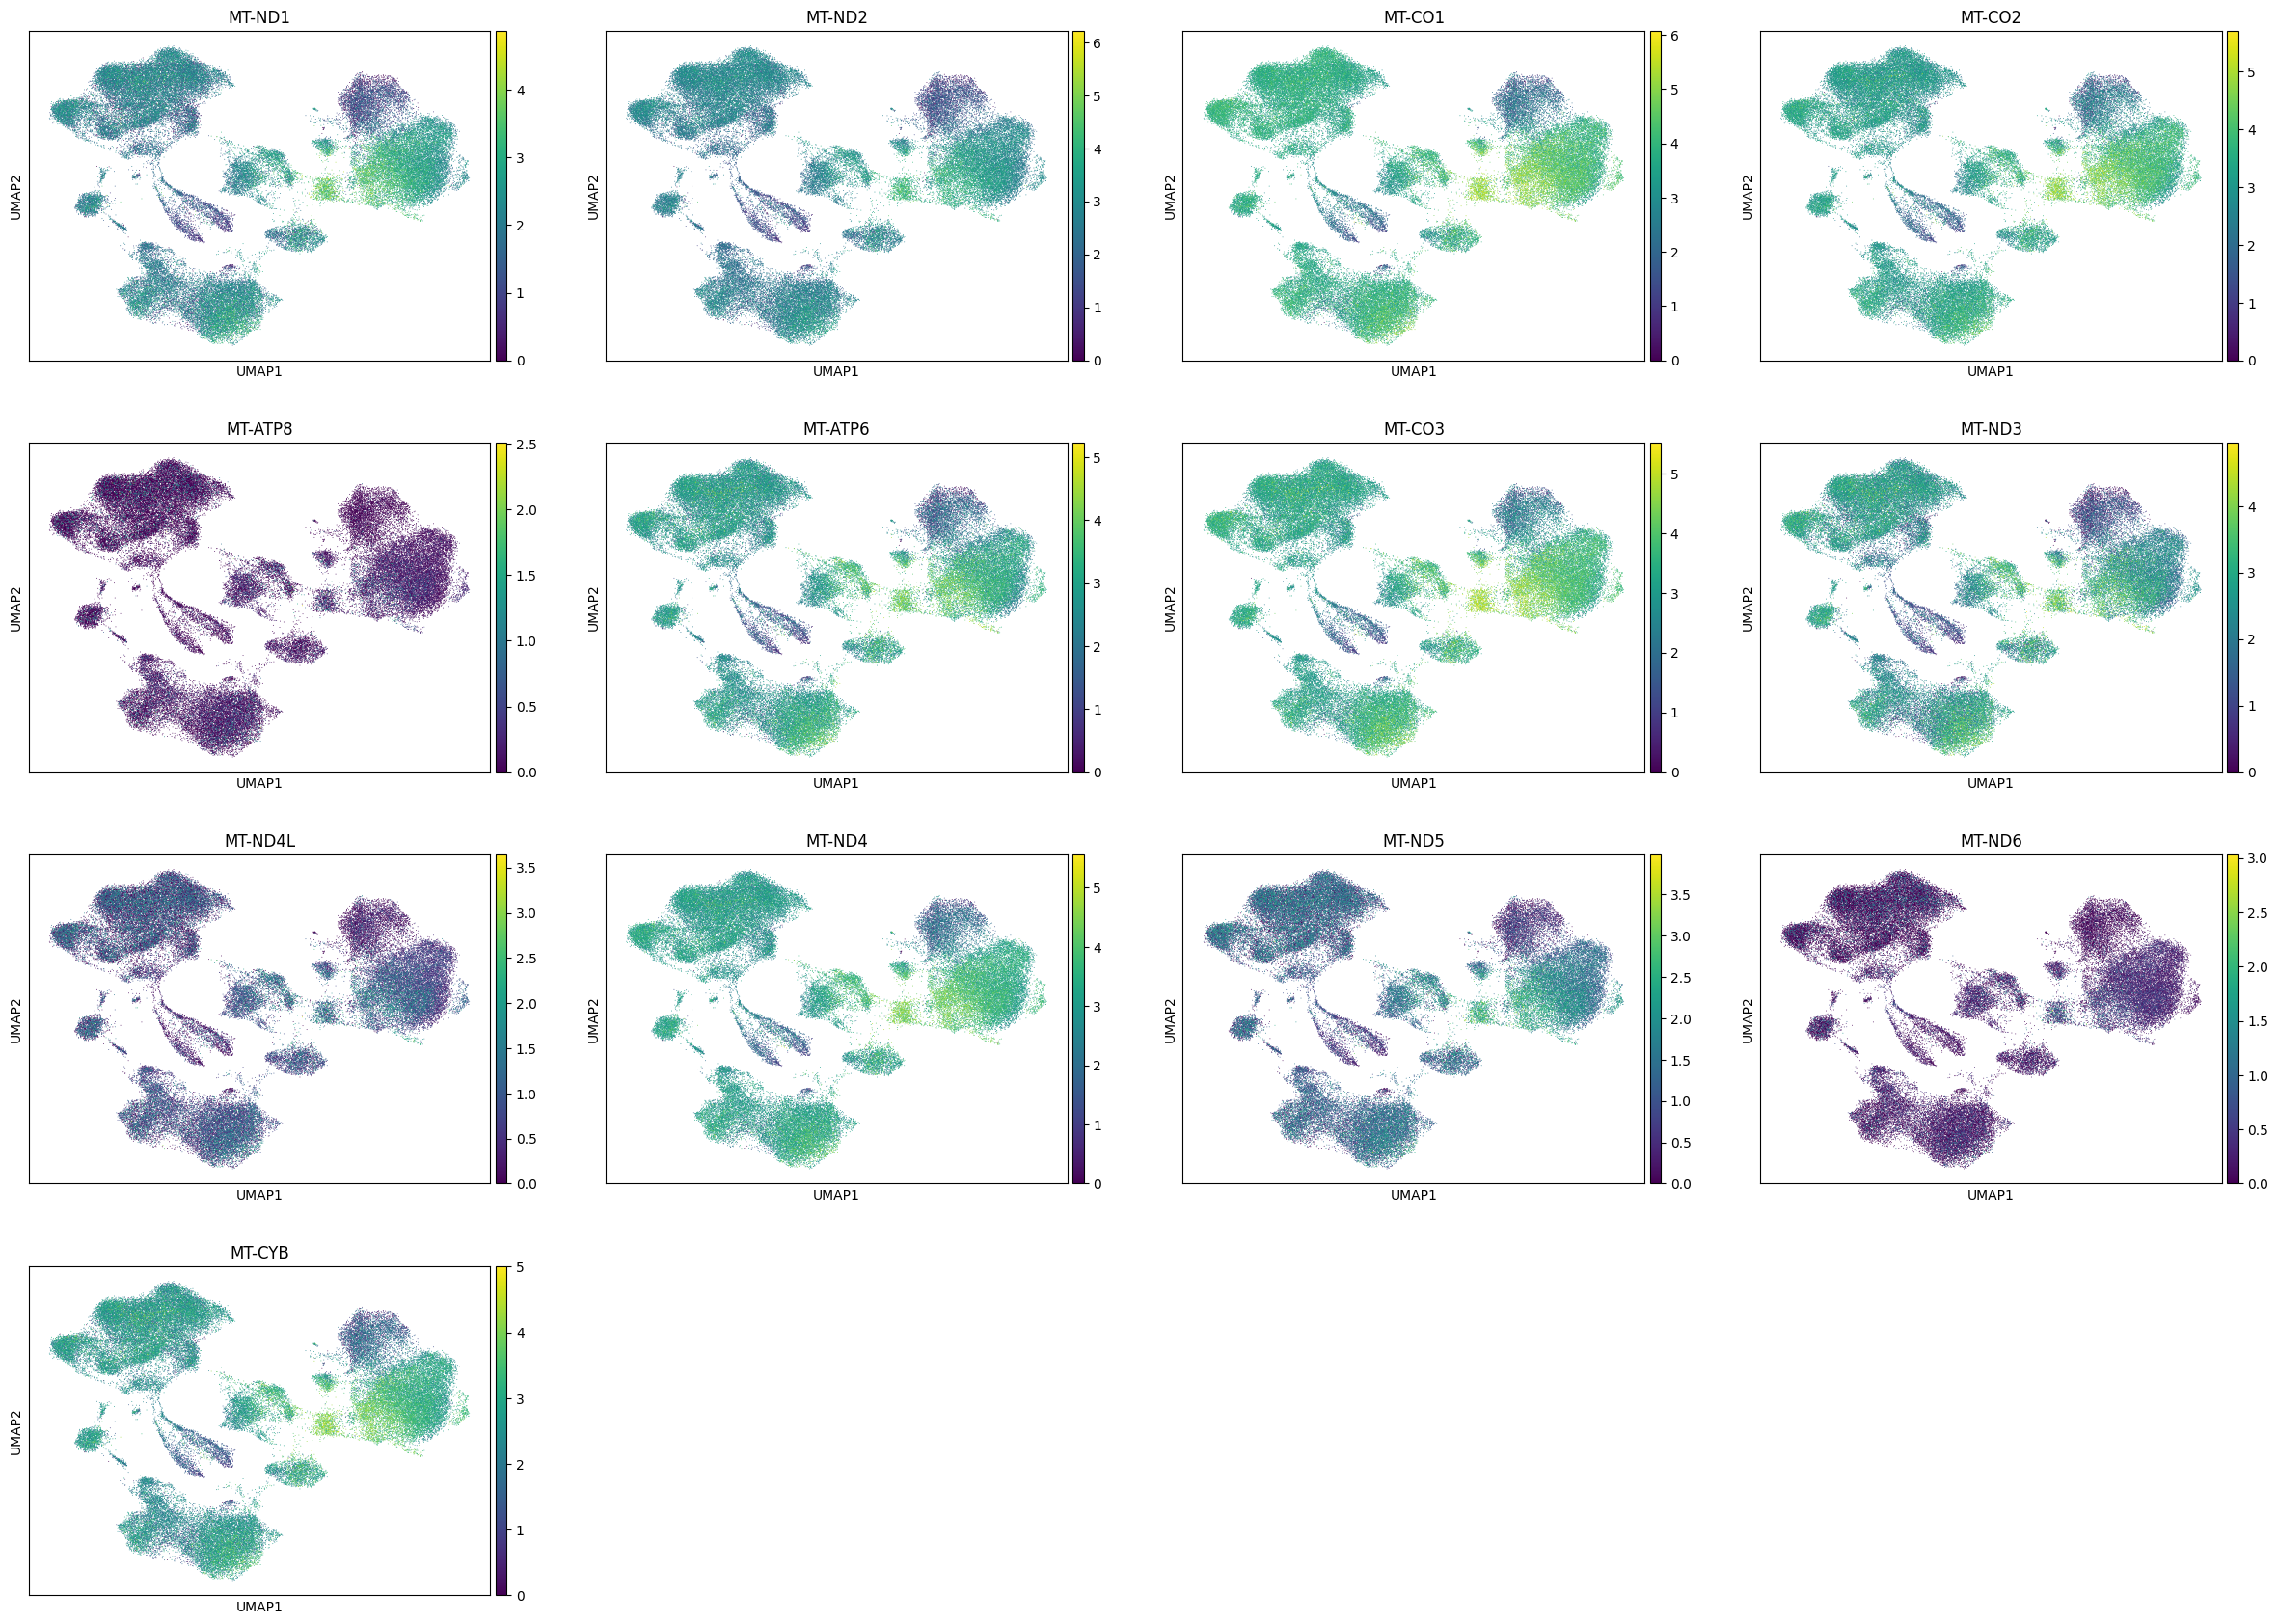

In [12]:
sc.pl.umap(adata, color=mito_genes)

## Mean Mito gene expression per cell

In [17]:
adata_mito = adata[:, mito_genes]
adata_mito.shape

(71915, 13)

In [19]:
adata_mito.obs['leiden']

,celltype,res_3_clus,sample,site,patient,stage,virus,leiden
HCC01T_AAACCTGAGGGCATGT,T/NK,13,HCC01T,Tumor,HCC01,I,HBV,Leiden_5
HCC01T_AAACCTGAGTCGCCGT,Myeloid,16,HCC01T,Tumor,HCC01,I,HBV,Leiden_3
HCC01T_AAACCTGCATTACCTT,T/NK,25,HCC01T,Tumor,HCC01,I,HBV,Leiden_5
HCC01T_AAACCTGGTCACACGC,T/NK,2,HCC01T,Tumor,HCC01,I,HBV,Leiden_1
HCC01T_AAACCTGTCCAGTATG,T/NK,2,HCC01T,Tumor,HCC01,I,HBV,Leiden_1


C:\Users\evanlee\AppData\Local\Temp\ipykernel_75608\344187947.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_expr_by_cluster = df.groupby('leiden').mean()


<Figure size 1200x600 with 0 Axes>

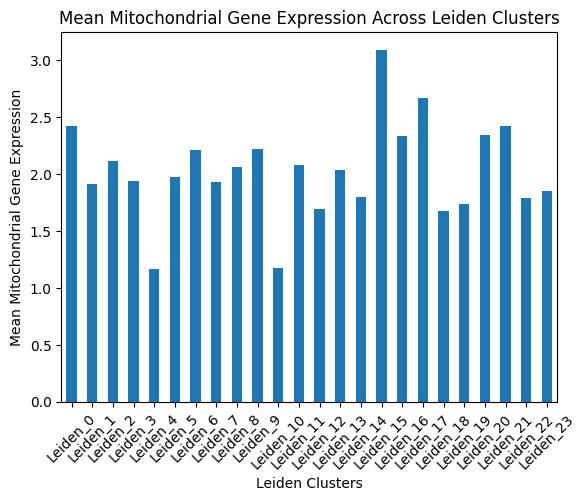

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate the mean expression of mitochondrial genes for each cell (row mean)
adata_mito.obs['mean_mito_expr'] = adata_mito.X.mean(axis=1)

# Convert to DataFrame for easy grouping and plotting
df = pd.DataFrame({
    'mean_mito_expr': adata_mito.obs['mean_mito_expr'],
    'leiden': adata_mito.obs['leiden']
})

# Group by 'leiden' and calculate the mean of mitochondrial gene expression per cluster
mean_expr_by_cluster = df.groupby('leiden').mean()

# Plot the mean mitochondrial gene expression across leiden clusters
plt.figure(figsize=(12, 6))
mean_expr_by_cluster.plot(kind='bar', legend=False)
plt.title('Mean Mitochondrial Gene Expression Across Leiden Clusters')
plt.xlabel('Leiden Clusters')
plt.ylabel('Mean Mitochondrial Gene Expression')
plt.xticks(rotation=45)
plt.show()


In [24]:
df

,mean_mito_expr,leiden
HCC01T_AAACCTGAGGGCATGT,2.176246,Leiden_5
HCC01T_AAACCTGAGTCGCCGT,2.431592,Leiden_3
HCC01T_AAACCTGCATTACCTT,3.451545,Leiden_5
HCC01T_AAACCTGGTCACACGC,1.963081,Leiden_1
HCC01T_AAACCTGTCCAGTATG,2.102593,Leiden_1
...,...,...
HCC06T_TTTGTCACAGTATGCT,1.083956,Leiden_10
HCC06T_TTTGTCAGTCCAAGTT,1.043435,Leiden_10
HCC06T_TTTGTCAGTTTGCATG,1.895918,Leiden_2
HCC06T_TTTGTCATCCTGTACC,1.445328,Leiden_3


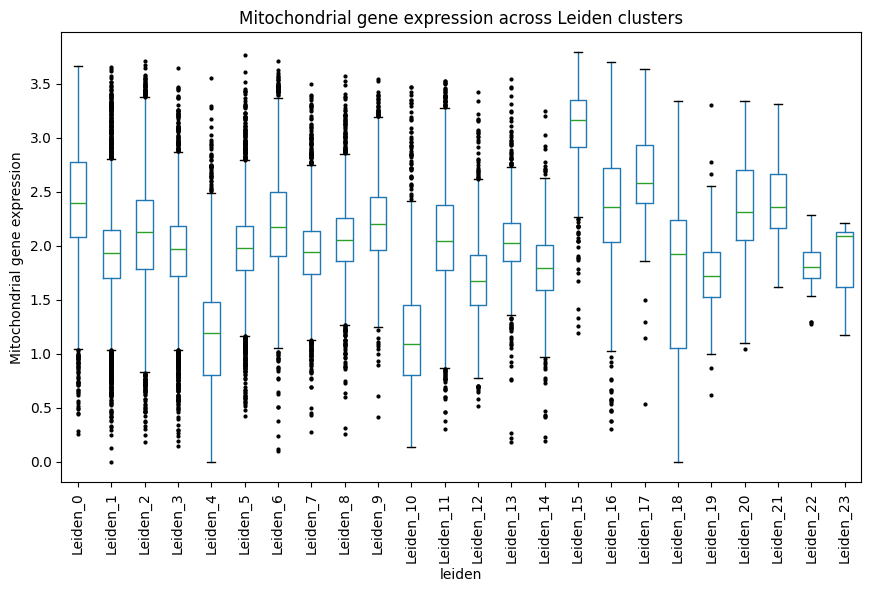

In [51]:
# plt.figure(figsize=(10, 6))
df.boxplot(column='mean_mito_expr', by='leiden', grid=False, flierprops={'marker': 'o', 'markersize': 2, 'markerfacecolor': 'black'}, figsize=(10, 6))
plt.title("Mitochondrial gene expression across Leiden clusters")
plt.suptitle('')  # Removes default matplotlib supertitle
# plt.xlabel("Leiden Clusters")
plt.ylabel("Mitochondrial gene expression")
plt.xticks(rotation=90)
plt.show()